<a href="https://colab.research.google.com/github/JarekMaleszyk/data-science-project-sandbox/blob/main/Seoul_Bike_sharing_demand_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import copy
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LinearRegression

Seoul Bike Sharing Demand. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5F62R.

Data from: https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

In [106]:
cols = ["date", "bike_count", "hour", "temperature", "humidity", "wind_speed", "visibility_on_10m", "dew_point_temperature", "solar_radiation", "rainfall_mm", "snowfall_cm", "seasons", "holiday", "functioning_day"]
df = pd.read_csv('/content/SeoulBikeData.csv', encoding='latin1', names=cols, skiprows=1)
df.sample(10)

,date,bike_count,hour,temperature,humidity,wind_speed,visibility_on_10m,dew_point_temperature,solar_radiation,rainfall_mm,snowfall_cm,seasons,holiday,functioning_day
4611,11/06/2018,232,3,18.8,61,1.3,2000,11.1,0.00,0.0,0.0,Summer,No Holiday,Yes
1594,05/02/2018,123,10,-9.6,32,3.7,2000,-23.2,1.14,0.0,0.0,Winter,No Holiday,Yes
6218,17/08/2018,572,2,22.8,50,1.4,2000,11.8,0.00,0.0,0.0,Summer,No Holiday,Yes
57,03/12/2017,152,9,3.5,91,1.8,231,2.1,0.02,2.5,0.0,Winter,No Holiday,Yes
3755,06/05/2018,10,11,15.5,97,0.8,459,15.0,0.40,3.5,0.0,Spring,No Holiday,Yes
6520,29/08/2018,193,16,27.0,76,3.8,1875,22.3,0.21,0.0,0.0,Summer,No Holiday,Yes
3759,06/05/2018,770,15,17.8,77,1.6,2000,13.7,1.13,0.0,0.0,Spring,No Holiday,Yes
4838,20/06/2018,1158,14,27.5,47,2.7,990,15.1,3.24,0.0,0.0,Summer,No Holiday,Yes
2807,27/03/2018,527,23,12.4,74,1.5,356,7.8,0.00,0.0,0.0,Spring,No Holiday,Yes
6464,27/08/2018,328,8,21.3,97,1.3,1029,20.7,0.17,0.5,0.0,Summer,No Holiday,Yes


In [107]:
df.drop(['seasons', 'holiday', 'date'], axis=1, inplace=True)

In [108]:
df.sample(n=10)

,bike_count,hour,temperature,humidity,wind_speed,visibility_on_10m,dew_point_temperature,solar_radiation,rainfall_mm,snowfall_cm,functioning_day
4470,733,6,17.8,73,0.4,1188,12.8,0.04,0.0,0.0,Yes
6958,988,22,21.4,87,2.4,540,19.1,0.00,0.0,0.0,Yes
430,160,22,1.5,82,2.4,537,-1.2,0.00,0.0,2.6,Yes
1715,235,11,2.6,62,2.9,294,-3.9,1.12,0.0,0.0,Yes
938,75,2,-2.9,66,3.3,1515,-8.3,0.00,0.0,1.0,Yes
405,168,21,-6.5,45,0.7,2000,-16.4,0.00,0.0,0.0,Yes
1942,357,22,1.0,69,0.7,525,-4.0,0.00,0.0,0.0,Yes
1187,283,11,2.2,20,0.6,1794,-18.5,0.83,0.0,0.0,Yes
3236,640,20,9.4,76,2.6,1376,5.3,0.00,0.0,0.0,Yes
4528,1442,16,29.3,41,2.0,905,14.6,1.95,0.0,0.0,Yes


In [109]:
df.temperature[df.temperature >= 0].count()

7327

In [110]:
df.functioning_day = df.functioning_day.map({'Yes': 1, 'No': 0}).astype(int)

In [111]:
df = df[df.hour == 12]
df.drop(columns=['hour'], axis=1, inplace=True)

In [112]:
df

,bike_count,temperature,humidity,wind_speed,visibility_on_10m,dew_point_temperature,solar_radiation,rainfall_mm,snowfall_cm,functioning_day
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
8652,752,9.1,57,1.1,562,1.0,1.69,0.0,0.0,1
8676,672,9.3,61,1.5,390,2.1,0.85,0.0,0.0,1
8700,635,7.9,14,1.7,1688,-18.0,1.81,0.0,0.0,1
8724,661,5.6,27,0.3,1522,-11.9,0.34,0.0,0.0,1


In [113]:
for i in range(len(df.columns)):
  print(f"Column [{i}] name: {df.columns[i]}")



Column [0] name: bike_count
Column [1] name: temperature
Column [2] name: humidity
Column [3] name: wind_speed
Column [4] name: visibility_on_10m
Column [5] name: dew_point_temperature
Column [6] name: solar_radiation
Column [7] name: rainfall_mm
Column [8] name: snowfall_cm
Column [9] name: functioning_day


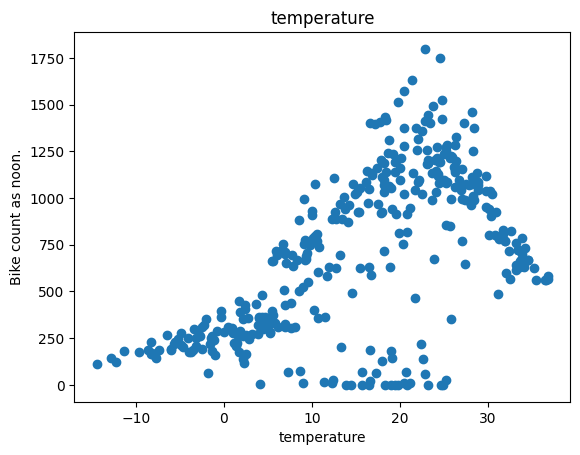

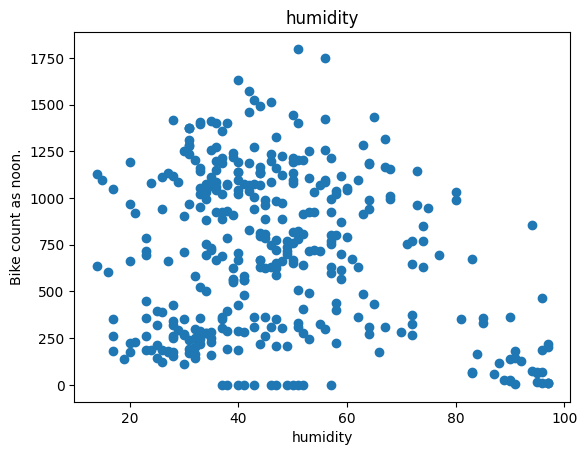

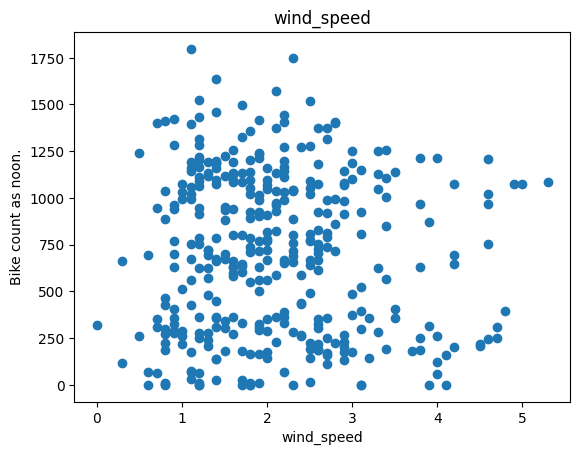

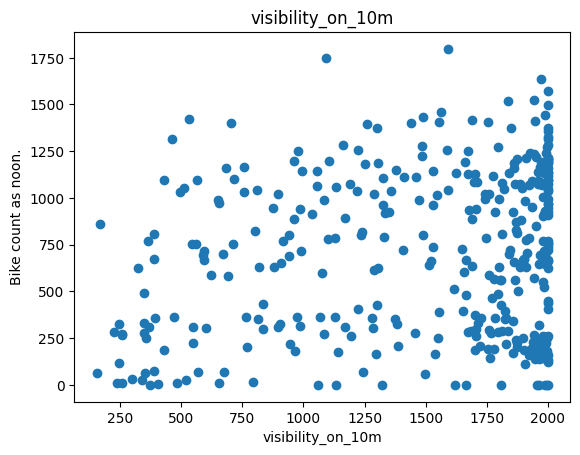

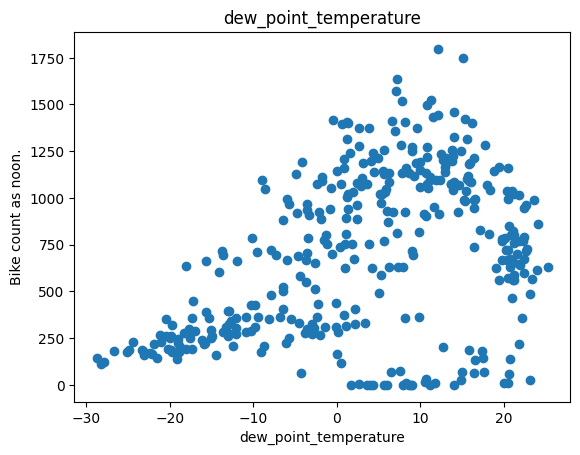

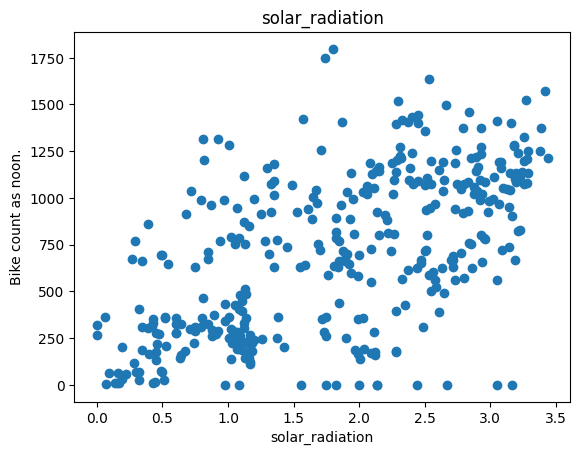

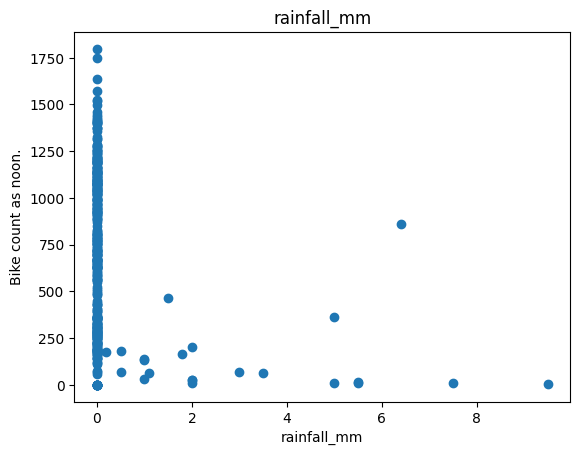

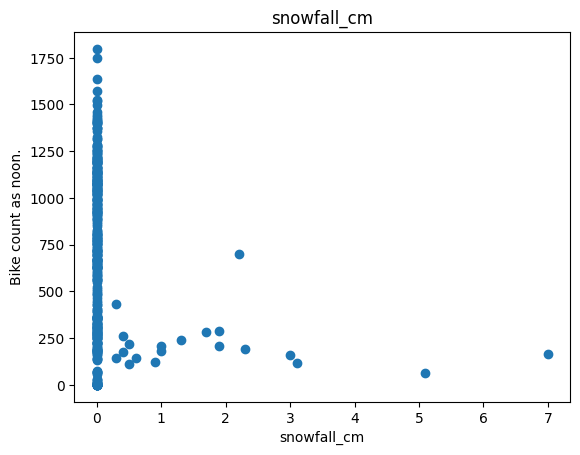

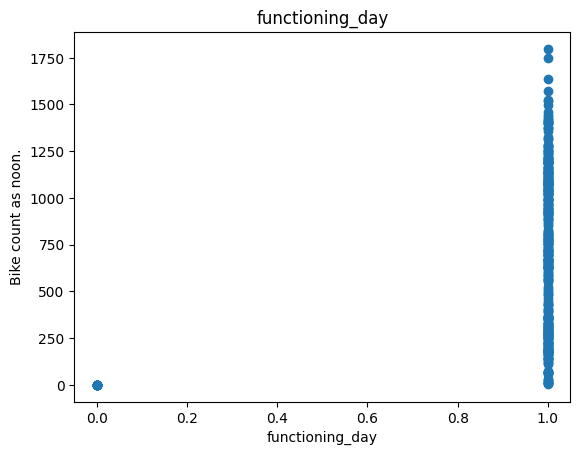

In [114]:
for label in df.columns[1:]:
  plt.scatter(df[label], df.bike_count)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('Bike count as noon.')
  # plt.legend()
  plt.show()

In [115]:
df.drop(columns=["wind_speed", "visibility_on_10m", "functioning_day"], axis=1, inplace=True)

In [116]:
df.sample(10)

,bike_count,temperature,humidity,dew_point_temperature,solar_radiation,rainfall_mm,snowfall_cm
8508,788,10.1,23,-10.1,1.82,0.0,0.0
4380,1076,28.2,34,10.8,3.26,0.0,0.0
3300,1112,18.0,26,-1.8,3.03,0.0,0.0
6708,1041,26.9,60,18.4,1.67,0.0,0.0
5892,585,36.8,41,21.3,2.53,0.0,0.0
4884,1116,29.8,28,9.3,3.21,0.0,0.0
1116,276,5.2,52,-3.8,0.45,0.0,0.0
3468,925,15.2,57,6.7,1.33,0.0,0.0
4164,1216,20.1,37,4.9,3.44,0.0,0.0
4404,1253,28.3,30,9.0,3.29,0.0,0.0


In [117]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [118]:
def get_xy(dataframe, y_label, x_label=None):
  dataframe = copy.deepcopy(dataframe)
  if x_label is None:
    X = dataframe[[c for c in dataframe.columns if c != y_label]].values
  else:
    if len(x_label) == 1:
      X = dataframe[x_label[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_label].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y



In [119]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_label=["temperature"])
_, X_valid_temp, y_valid_temp = get_xy(valid, "bike_count", x_label=["temperature"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_label=["temperature"])


## LinearRegression

In [120]:
temp_regressor = LinearRegression()
temp_regressor.fit(X_train_temp, y_train_temp)

LinearRegression()

In [121]:
print(temp_regressor.coef_)
print(temp_regressor.intercept_)
print(temp_regressor.rank_)
print(temp_regressor.n_features_in_)

[[20.11666197]]
[372.5662684]
1
1


In [122]:
temp_regressor.score(X_train_temp, y_train_temp)

0.27459941356696227

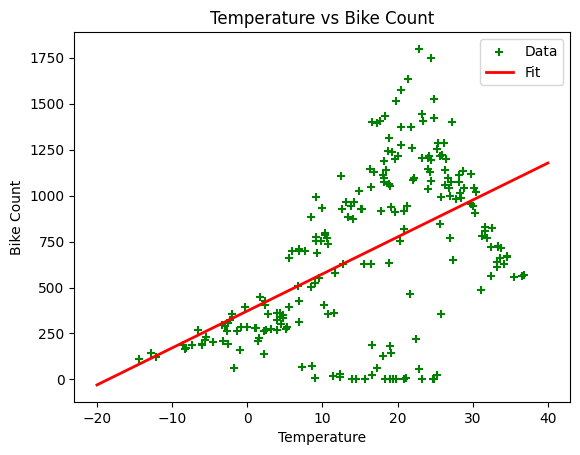

In [123]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color='green', marker="+")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_regressor.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=2)
plt.legend()
plt.title("Temperature vs Bike Count")
plt.xlabel("Temperature")
plt.ylabel("Bike Count")
plt.show()

In [124]:
df.columns

Index(['bike_count', 'temperature', 'humidity', 'dew_point_temperature',
       'solar_radiation', 'rainfall_mm', 'snowfall_cm'],
      dtype='object')

## Multiple Linear Regression

In [125]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_label=df.columns[1:])
_, X_valid_all, y_valid_all = get_xy(valid, "bike_count", x_label=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_label=df.columns[1:])

In [126]:
all_regressor = LinearRegression()
all_regressor.fit(X_train_all, y_train_all)

LinearRegression()

In [127]:
print(all_regressor.coef_) # Shift + Alt for column edition
print(all_regressor.intercept_)
print(all_regressor.rank_)
print(all_regressor.n_features_in_)

[[  4.84999575  -6.74883622  11.86558128 115.70303488 -31.90188965
  -18.62986611]]
[690.67370715]
6
6


In [128]:
all_regressor.score(X_train_all, y_train_all)

0.4225379488186205

## Regression with Neural Network

In [133]:
def plot_loss(history) -> None:
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [129]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [130]:
temp_nn_model = tf.keras.Sequential(
    [
        temp_normalizer,
        tf.keras.layers.Dense(units=1)
    ]
)

In [131]:
temp_nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss=tf.keras.losses.MeanSquaredError(),
)

In [132]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1),
    y_train_temp,
    epochs=1000,
    verbose=0,
    validation_data=(X_valid_temp, y_valid_temp)
)

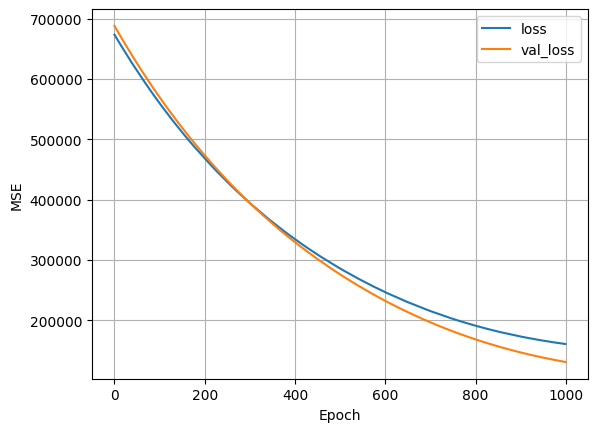

In [134]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


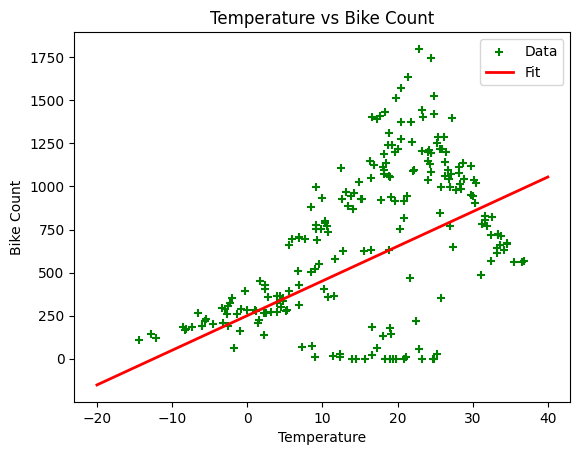

In [136]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color='green', marker="+")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=2)
plt.legend()
plt.title("Temperature vs Bike Count")
plt.xlabel("Temperature")
plt.ylabel("Bike Count")
plt.show()